In [2]:
# import the packages and datasets
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
# load the dataset 
boston_dataset = datasets.load_boston()
# check what are key fields in their 
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
# load actual data that needed for the impplementation
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# Input 
X = boston_pd.iloc[:, : -1]
    
# Ouput 
Y = boston_pd.iloc[:,-1]
    
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [17]:
# split the dataset into train and test 
x_train, x_test, y_train , y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size=0.25)


print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s :"%(x_test.shape,y_test.shape))



Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) :


Learned how to print the data with the string using pytho 

# Linear Regression

In [24]:
# Apply multiple linear Regression model
lreg = LinearRegression()
lreg.fit(x_train,y_train)

# Generate preditio on the test data 
lreg_y_pred = lreg.predict(x_test)

# calculating the meansqure error (MSE)
mean_sqaure_erorr = np.mean((lreg_y_pred - y_test)**2)
print("Mean Squre error on test set:",mean_sqaure_erorr)

# putting together the coefficient and their corresponding varible names

# creating the data frame to hold the coefficinent of each columns 
lreg_coefficient = pd.DataFrame()
# create the columns attributet to hold the column names of the dataset
lreg_coefficient["Columns"] = x_train.columns
# store the every variable's coefficient in coefficient columns name of the trained MODLE
lreg_coefficient['Coefficient Esitimate'] = pd.Series(lreg.coef_)
# print the dataframe of the coefficient
print(lreg_coefficient)


Mean Squre error on test set: 23.68322563453542
    Columns  Coefficient Esitimate
0      CRIM              -0.130235
1        ZN               0.055250
2     INDUS               0.036988
3      CHAS               1.709348
4       NOX             -15.782106
5        RM               3.681998
6       AGE               0.009743
7       DIS              -1.518864
8       RAD               0.360880
9       TAX              -0.013196
10  PTRATIO              -0.916155
11        B               0.011452
12    LSTAT              -0.589196


NOTE

Try to find out the what is Coefficinet and math behind it
lso study the statistics and mathematics of machine learning 

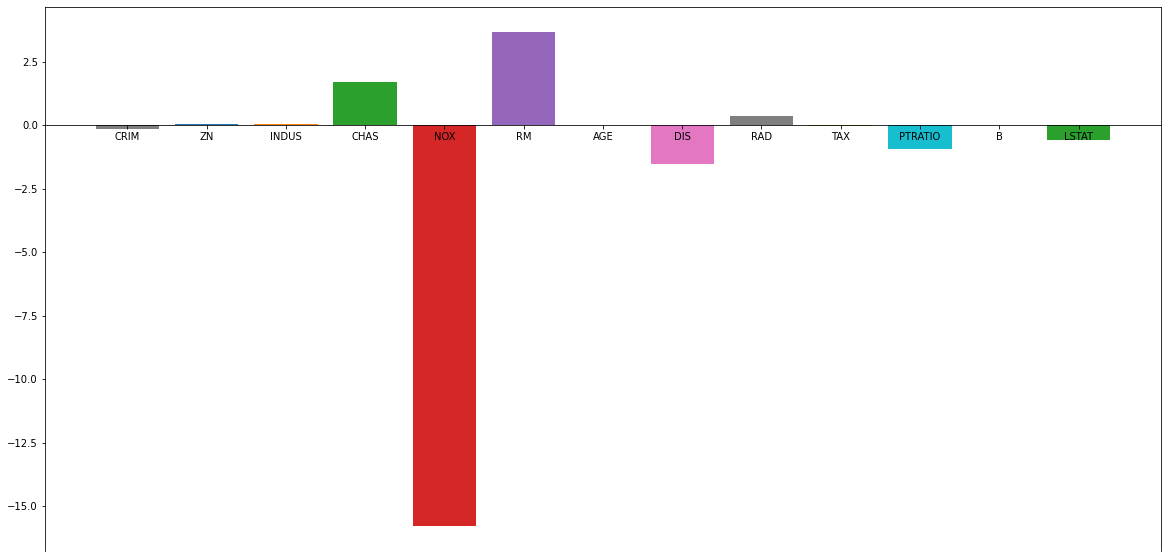

In [26]:
#  plot the coefficient of the columns 
fig, ax = plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:orange',
      'tab:green','tab:red','tab:purple','tab:brown',
      'tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive',]
ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Esitimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

Now our motive to reduce the coefficient

# Ridge Regression

In [35]:
#  Noe motivation to reduce the coefficient score - bring them much as possible 

# import ridge regression model from sklearn library
from sklearn.linear_model import Ridge

# Train the model 
#    initate the ridge model and setting up the alpha to 1
ridgeR = Ridge(alpha=1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error 
mean_square_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean Squre Error on test set", mean_square_error_ridge)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = x_train.columns
ridge_coefficient['Coefficient Esitimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)



Mean Squre Error on test set 24.251385812154734
    Columns  Coefficient Esitimate
0      CRIM              -0.127776
1        ZN               0.056301
2     INDUS               0.002563
3      CHAS               1.620826
4       NOX              -8.619515
5        RM               3.700467
6       AGE               0.003457
7       DIS              -1.410756
8       RAD               0.340904
9       TAX              -0.013418
10  PTRATIO              -0.823128
11        B               0.011903
12    LSTAT              -0.602058


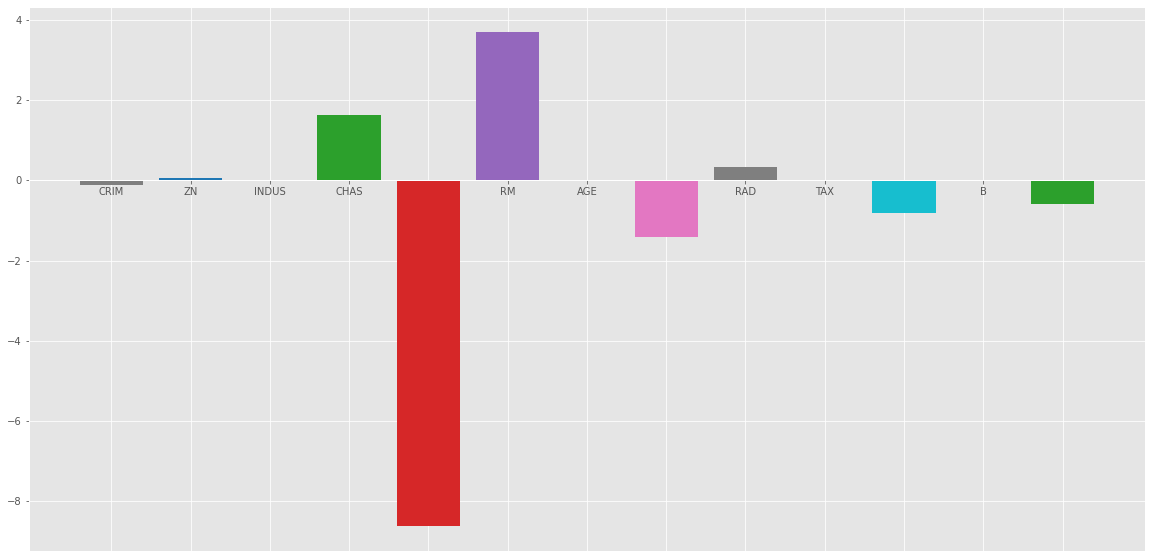

In [36]:
#  plot the coefficient of the columns 
fig, ax = plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:orange',
      'tab:green','tab:red','tab:purple','tab:brown',
      'tab:pink','tab:gray','tab:olive','tab:cyan',
      'tab:orange','tab:green','tab:blue','tab:olive',]
ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Esitimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

# Lasso Regression 

In [39]:
# improt lasso Regression from sklearn library
from sklearn.linear_model import Lasso 

# Train the model
lasso = Lasso(alpha = 1 )
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

# Calculate the Mean Squre Error (MSE)
mean_square_error = np.mean((y_pred - y_test)**2)
print("Mean square error on test set", mean_square_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean square error on test set 29.643164413158228
    Columns  Coefficient Estimate
0      CRIM             -0.078629
1        ZN              0.053572
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.846916
6       AGE              0.029665
7       DIS             -0.678018
8       RAD              0.300351
9       TAX             -0.014329
10  PTRATIO             -0.674632
11        B              0.010726
12    LSTAT             -0.821766


As we compare the model that we build (Multiple linear regression, Ridge Regression model, and Lasso Regression model)
and the Multiple linear modelis performed well because the MSE is less than other two models 

The MSE: 
lreg =   23.68322563453542,
ridgeR = 24.251385812154734,
lasso =  29.643164413158228